![keras](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)

**The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

W0616 08:21:28.369107 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 08:21:28.382740 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 08:21:28.385447 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 08:21:28.415419 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0616 08:21:28.468100 140388590438272 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)        0         
__________

In [0]:
# initiate optimizer
opt = keras.optimizers.adam(lr=0.001)

In [11]:
# Let's train the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0616 08:21:29.313022 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 08:21:29.326372 140388590438272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mcp = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
es = EarlyStopping(monitor='loss', min_delta=0, patience=1, verbose=0)

In [14]:
model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[mcp, es])

W0616 08:21:30.708004 140388590438272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 12s 308us/step - loss: 1.4893 - acc: 0.4616 - val_loss: 1.2527 - val_acc: 0.5572
Epoch 2/10
40000/40000 [==============================] - 9s 230us/step - loss: 1.0624 - acc: 0.6267 - val_loss: 0.9619 - val_acc: 0.6660
Epoch 3/10
40000/40000 [==============================] - 9s 227us/step - loss: 0.8776 - acc: 0.6937 - val_loss: 0.8092 - val_acc: 0.7143
Epoch 4/10
40000/40000 [==============================] - 9s 227us/step - loss: 0.7508 - acc: 0.7390 - val_loss: 0.7594 - val_acc: 0.7337
Epoch 5/10
40000/40000 [==============================] - 9s 227us/step - loss: 0.6613 - acc: 0.7712 - val_loss: 0.7508 - val_acc: 0.7472
Epoch 6/10
40000/40000 [==============================] - 9s 227us/step - loss: 0.5739 - acc: 0.7976 - val_loss: 0.7263 - val_acc: 0.7522
Epoch 7/10
40000/40000 [==============================] - 9s 227us/step - loss: 0.5052 - acc: 0.8222 - val_loss: 0.7777 -

In [15]:
from keras.models import load_model

model = load_model('best_model.h5')

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 91us/step
Test loss: 0.7515166377067566
Test accuracy: 0.749


In [0]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

url = 'https://i.ytimg.com/vi/YCaGYUIfdy4/maxresdefault.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img2 = img

In [0]:
img = img.resize((32,32))
img = np.array(img, dtype=np.float32)
img /= 255

In [18]:
prob = model.predict(img.reshape(1,32,32,3))
prob

array([[1.2887631e-02, 9.7994089e-05, 2.9996217e-03, 6.0115885e-02,
        2.0031318e-02, 1.9196241e-01, 1.2171098e-03, 6.6785270e-01,
        3.6585797e-03, 3.9176788e-02]], dtype=float32)

In [0]:
label = {
0 : 'airplane',
1 : 'automobile',
2 : 'bird',
3 : 'cat',
4 : 'deer',
5 : 'dog',
6 : 'frog',
7 : 'horse',
8 : 'ship',
9 : 'truck'
}

Text(0.5, 1.0, 'This is a(n) horse!')

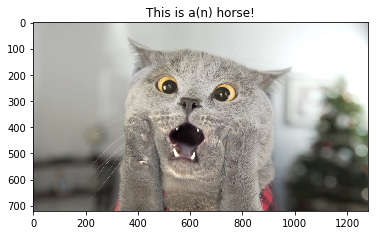

In [20]:
predict_class = np.argmax(prob, axis=1)


plt.imshow(img2)
plt.title("This is a(n) " + label[predict_class[0]] + "!")